# Лабораторная работа 2

## Описание датасета

Эти данные являются характеристиками белого вина. Набор данных загружен с https://archive.ics.uci.edu/ml/datasets/Wine+Quality. Для удобства был пересохранен, так как, хоть он и был в формате .csv (разделители - запятые), данные были в виде обычной таблицы. В нём 4898 записей и 12 атрибутов.

Attribute Information:
 - fixed acidity
 - volatile acidity
 - citric acid
 - residual sugar
 - chlorides
 - free sulfur dioxide
 - total sulfur dioxide
 - density
 - pH
 - sulphates
 - alcohol
 
Output variable (based on sensory data):
 - quality (score between 0 and 10)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATASET = pd.read_csv('../lab2/winequality-white.csv')

In [3]:
DATASET.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


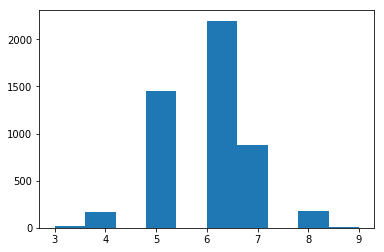

In [4]:
quality = DATASET['quality'].sort_values().values
plt.hist(quality)
plt.show()

In [5]:
DS_PROCESSED = DATASET.copy()

In [6]:
min_ = DS_PROCESSED.min()
max_ = DS_PROCESSED.max()
mean_ = DS_PROCESSED.mean()
std_ = DS_PROCESSED.std()
nulls = DS_PROCESSED.isnull().sum()
stats = pd.DataFrame({'Пропуски': nulls, 'Мин.': min_, 'Макс.': max_, 'Средн.': mean_, 'Ст. откл.': std_})
stats

,Пропуски,Мин.,Макс.,Средн.,Ст. откл.
fixed acidity,0,3.80000,14.20000,6.854788,0.843868
volatile acidity,0,0.08000,1.10000,0.278241,0.100795
citric acid,0,0.00000,1.66000,0.334192,0.121020
residual sugar,0,0.60000,65.80000,6.391415,5.072058
chlorides,0,0.00900,0.34600,0.045772,0.021848
free sulfur dioxide,0,2.00000,289.00000,35.308085,17.007137
total sulfur dioxide,0,9.00000,440.00000,138.360657,42.498065
density,0,0.98711,1.03898,0.994027,0.002991
pH,0,2.72000,3.82000,3.188267,0.151001
sulphates,0,0.22000,1.08000,0.489847,0.114126


In [7]:
DS_PROCESSED = DATASET.copy()

In [8]:
DS_PROCESSED.corr()['quality'].sort_values().to_frame()

,quality
density,-0.307123
chlorides,-0.209934
volatile acidity,-0.194723
total sulfur dioxide,-0.174737
fixed acidity,-0.113663
residual sugar,-0.097577
citric acid,-0.009209
free sulfur dioxide,0.008158
sulphates,0.053678
pH,0.099427


In [9]:
FEATURE_LABELS = ['alcohol', 'pH', 'sulphates','free sulfur dioxide', 'citric acid']
FEATURES = DS_PROCESSED[FEATURE_LABELS]
TARGET = DS_PROCESSED['quality']

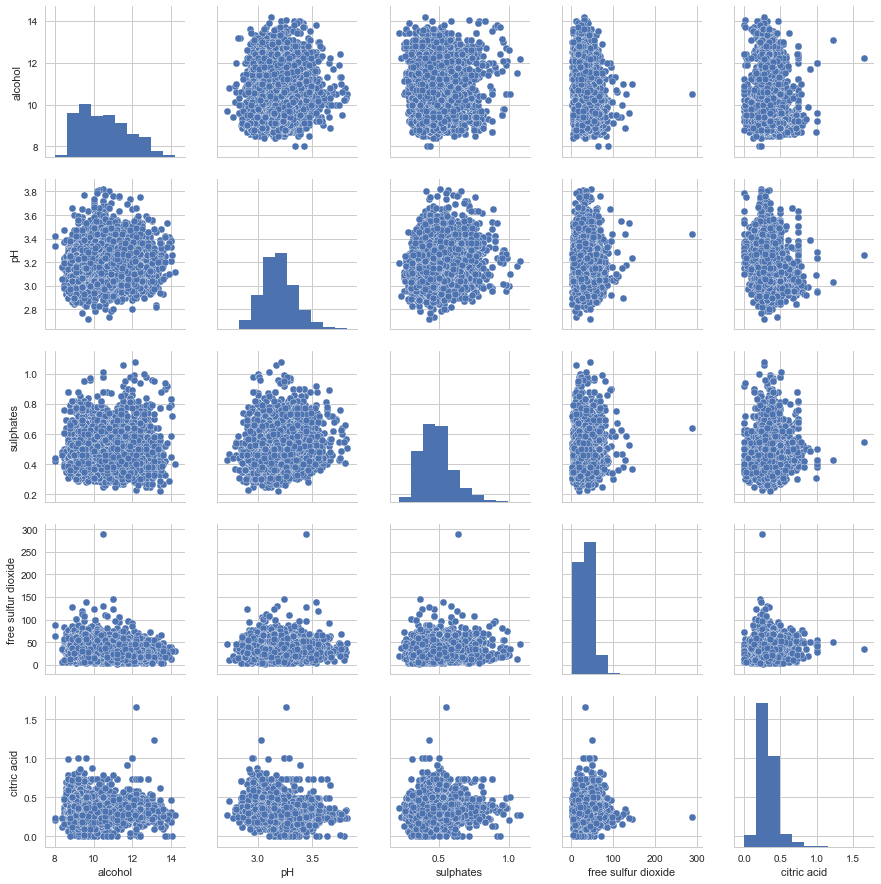

In [10]:
import seaborn as sns
sns.set(style= 'whitegrid', context = 'notebook')
sns.pairplot(FEATURES , size=2.5)
plt.show()

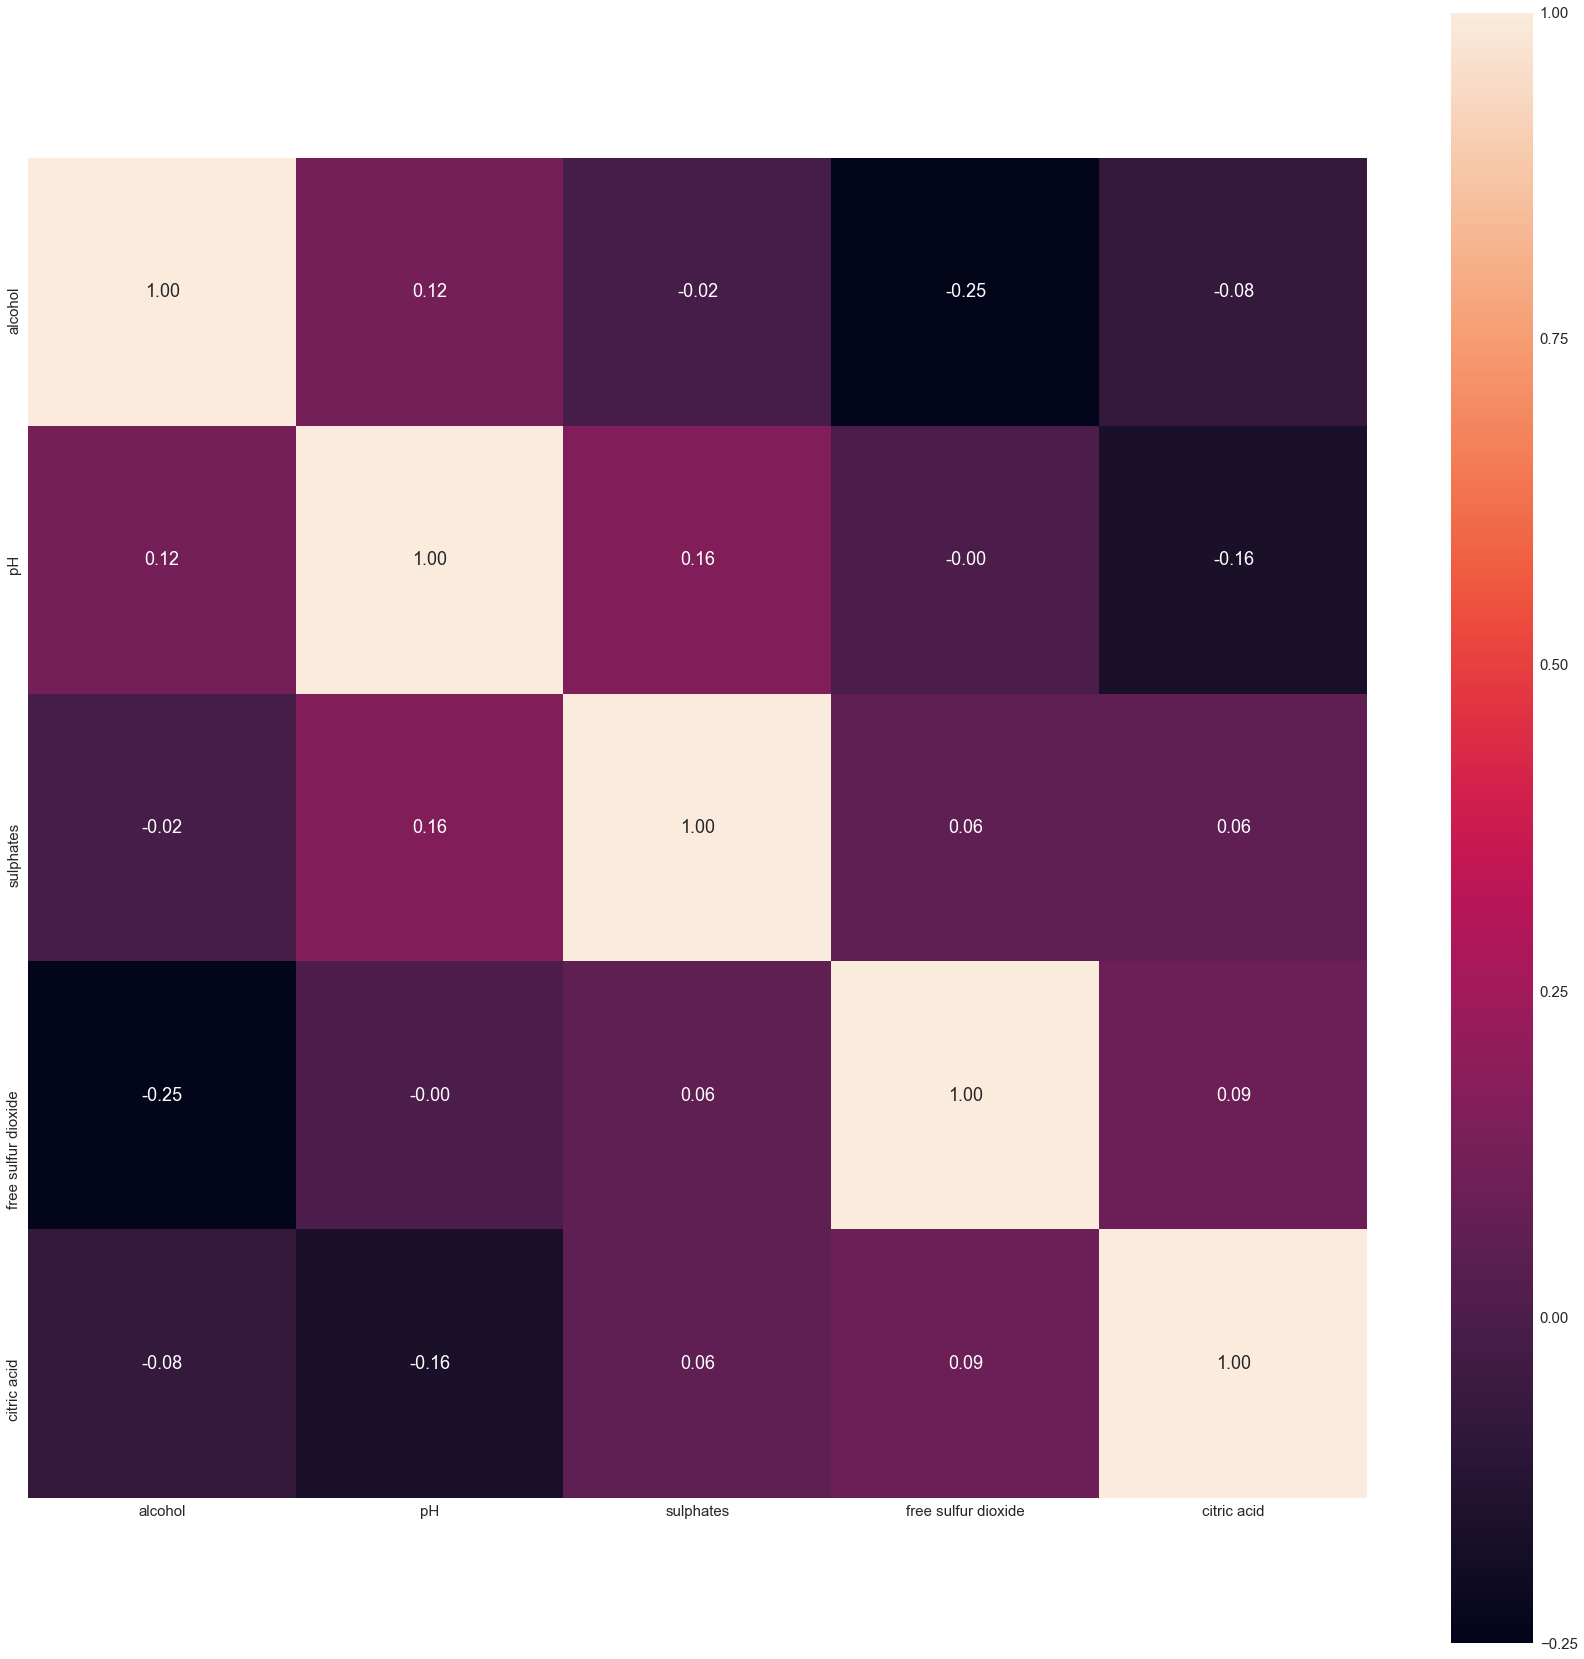

In [11]:
cm = np.corrcoef(FEATURES.values.T)
sns.set(font_scale=1.5)
_, ax = plt.subplots(figsize=(30, 30))
hm = sns.heatmap(cm, annot=True, cbar=True, square=True, fmt='.2f', ax=ax, xticklabels=FEATURE_LABELS, yticklabels=FEATURE_LABELS)
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(FEATURES, TARGET, test_size=0.3, random_state=0)

def print_mse(y_train_pred, y_train, y_test_pred, y_test):
    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)

    print('MSE train: %.3f' % MSE_train)
    print('MSE test: %.3f' % MSE_test)
    
def print_r2(y_train_pred, y_train, y_test_pred, y_test):
    R2_train = r2_score(y_train, y_train_pred)
    R2_test = r2_score(y_test, y_test_pred)

    print('R2 train: %.3f' % R2_train)
    print('R2 test: %.3f' % R2_test)
    
def plt_predictions(y_train_pred, y_train, y_test_pred, y_test):
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Train data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Remains')

    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=4, xmax=9, lw=2, color='red')
    plt.xlim([4, 9])
    plt.style.use('classic')
    plt.show()

## Линейная регрессия

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
slr = LinearRegression()
slr.fit(X_train, y_train)

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

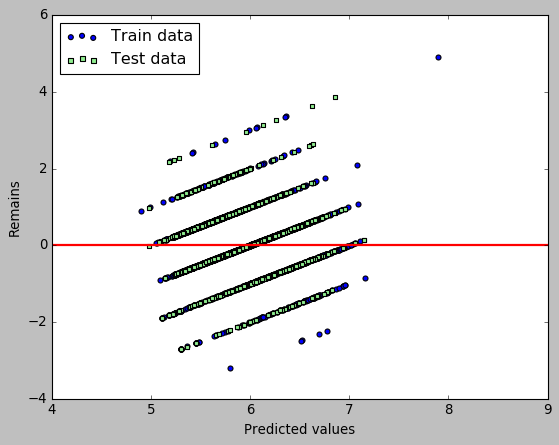

MSE train: 0.603
MSE test: 0.664
R2 train: 0.220
R2 test: 0.179


In [15]:
plt.style.use('classic')
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Train data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Remains')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=4, xmax=9, lw=2, color='red')
plt.xlim([4, 9])
plt.show()
print_mse(y_train_pred, y_train, y_test_pred, y_test)
print_r2(y_train_pred, y_train, y_test_pred, y_test)

## Полиномиальные регрессия

In [16]:
from sklearn.preprocessing import PolynomialFeatures
X = DS_PROCESSED[['alcohol']]
y = DS_PROCESSED['quality']
regr = LinearRegression()

In [17]:
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

In [18]:
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [19]:
# linear
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)

linear_mse = mean_squared_error(y, regr.predict(X))
linear_r2 = r2_score(y, regr.predict(X))

print('MSE = %.2f' % linear_mse)
print('R2 = %.2f' % linear_r2)

MSE = 0.64
R2 = 0.19


In [20]:
#quadratic
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))

quadratic_mse = mean_squared_error(y, regr.predict(X_quad))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

print('MSE = %.2f' % quadratic_mse)
print('R2 = %.2f' % quadratic_r2)

MSE = 0.63
R2 = 0.19


In [21]:
# cubic
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))

cubic_mse = mean_squared_error(y, regr.predict(X_cubic))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

print('MSE = %.2f' % cubic_mse)
print('R2 = %.2f' % cubic_r2)

MSE = 0.63
R2 = 0.20


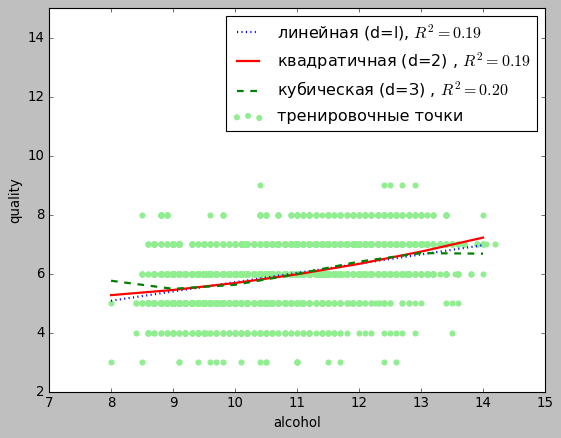

In [22]:
plt.scatter(X, y, label='тренировочные точки', color='lightgreen')
plt.plot(X_fit , y_lin_fit, label='линейная (d=l), $R^2=%.2f$' % linear_r2 , color='blue', lw=2 , linestyle=':')
plt.plot(X_fit , y_quad_fit, label='квадратичная (d=2) , $R^2=%.2f$' % quadratic_r2 , color='red' , lw=2 , linestyle='-')
plt.plot(X_fit, y_cubic_fit, label='кубическая (d=З) , $R^2=%.2f$' % cubic_r2 , color='green', lw=2 , linestyle='--')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.ylim([2, 15])
plt.legend(loc='upper right')
plt.show()


## Случайный лес

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
FEATURES = DS_PROCESSED.loc[:, DS_PROCESSED.columns != 'quality']
TARGET = DS_PROCESSED['quality']

In [25]:
forest = RandomForestRegressor(n_estimators=1000).fit(FEATURES, TARGET)

In [26]:
def print_importance(forest, columns):
    df = pd.DataFrame(
            list(zip(
                forest.feature_importances_.round(decimals=4),
                columns
            )),
            columns = ['importance', 'feature']
        ).sort_values('importance', ascending=False)
    return df

In [27]:
print_importance(forest, FEATURES.columns).head()

,importance,feature
10,0.2426,alcohol
1,0.1240,volatile acidity
5,0.1164,free sulfur dioxide
8,0.0702,pH
6,0.0697,total sulfur dioxide


In [28]:
FEATURES = DS_PROCESSED[['alcohol', 'volatile acidity', 'free sulfur dioxide', 'pH', 'residual sugar']]
TARGET = DS_PROCESSED['quality']
X_train, X_test, Y_train, Y_test = train_test_split(FEATURES, TARGET, test_size = 0.3)

In [29]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000,
                              criterion='mse',
                              random_state=0,
                              n_jobs=-1)

forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print_mse(y_train_pred, y_train, y_test_pred, y_test)
print_r2(y_train_pred, y_train, y_test_pred, y_test)

MSE train: 0.210
MSE test: 0.925
R2 train: 0.728
R2 test: -0.143


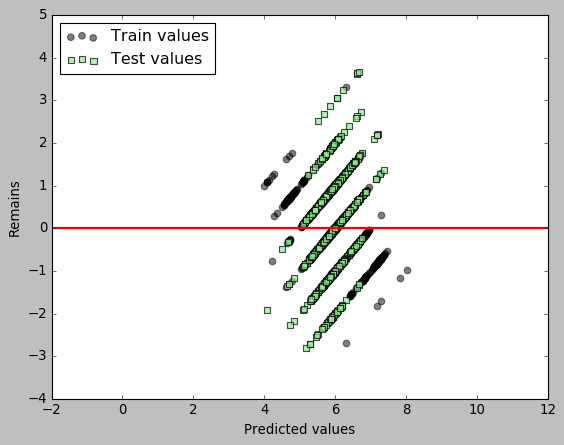

In [30]:
plt.scatter(y_train_pred,
           y_train_pred-y_train,
           c='black',
           marker='o',
           s=35,
           alpha=0.5,
           label='Train values'
           )

plt.scatter(y_test_pred,
           y_test_pred - y_test,
           c='lightgreen',
           marker='s',
           s=35,
           alpha=0.7,
           label='Test values'
           )

plt.xlabel('Predicted values')
plt.ylabel('Remains')

plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-2, xmax=12, lw=2, color='red')
plt.xlim([-2, 12])
plt.show()